In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
# reflect an existing database into a new model
Base = automap_base()

In [3]:
engine = create_engine("sqlite:///../sqlite_db/stock_market_sqlite.db")

In [4]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
bases = Base.classes.keys()
bases

['GME', 'MSFT', 'TSLA']

In [6]:
# Save references to each table
tesla = Base.classes.TSLA
microsoft = Base.classes.MSFT
gamestop = Base.classes.GME

In [7]:
tesla

sqlalchemy.ext.automap.TSLA

In [8]:
# Create session (link) from Python to the DB
session = Session(engine)

In [9]:
# Inspect column names and types for TSLA table
inspector = inspect(engine)
for base in bases:
    columns = inspector.get_columns(base)
    for column in columns:
        print(column["name"], column["type"])

index BIGINT
Date DATETIME
Open FLOAT
High FLOAT
Low FLOAT
Close FLOAT
Adj Close FLOAT
Volume BIGINT
index BIGINT
Date DATETIME
Open FLOAT
High FLOAT
Low FLOAT
Close FLOAT
Adj Close FLOAT
Volume BIGINT
index BIGINT
Date DATETIME
Open FLOAT
High FLOAT
Low FLOAT
Close FLOAT
Adj Close FLOAT
Volume BIGINT


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Perform a query to retrieve tesla data
tesla_results = session.query(tesla.Date, tesla.Close).all()
tesla_df = pd.DataFrame(tesla_results, columns=["Date", "Close"])

In [12]:
tesla_df

,Date,Close
0,2015-12-31,48.001999
1,2016-01-04,44.681999
2,2016-01-05,44.686001
3,2016-01-06,43.807999
4,2016-01-07,43.130001
...,...,...
1284,2021-02-08,863.419983
1285,2021-02-09,849.460022
1286,2021-02-10,804.820007
1287,2021-02-11,811.659973


In [13]:
tesla_df.describe()

,Close
count,1289.000000
mean,119.196926
std,161.502303
min,28.733999
25%,47.784000
50%,62.043999
75%,72.706001
max,883.090027


## Modelling

In [14]:
# Rename features as these names are needed for model fitting
tesla_df = tesla_df.rename(columns={"Date":"ds", "Close":"y"})

In [15]:
tesla_df

,ds,y
0,2015-12-31,48.001999
1,2016-01-04,44.681999
2,2016-01-05,44.686001
3,2016-01-06,43.807999
4,2016-01-07,43.130001
...,...,...
1284,2021-02-08,863.419983
1285,2021-02-09,849.460022
1286,2021-02-10,804.820007
1287,2021-02-11,811.659973


In [17]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [17]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(tesla_df) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [18]:
tesla_df

,ds,y
0,2015-12-31,48.001999
1,2016-01-04,44.681999
2,2016-01-05,44.686001
3,2016-01-06,43.807999
4,2016-01-07,43.130001
...,...,...
1284,2021-02-08,863.419983
1285,2021-02-09,849.460022
1286,2021-02-10,804.820007
1287,2021-02-11,811.659973


In [19]:
# we specify the number of days of future predictions
future = m.make_future_dataframe(periods=365) 
forecast_data = m.predict(future)

In [20]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-12-31,40.047062,-8.014266,72.495611,40.047062,40.047062,-7.266557,-7.266557,-7.266557,-31.18622,...,-1.687556,-1.687556,-1.687556,25.607219,25.607219,25.607219,0.0,0.0,0.0,32.780506
1,2016-01-04,41.342853,1.350539,81.112019,41.342853,41.342853,-0.013294,-0.013294,-0.013294,-31.18622,...,-0.802107,-0.802107,-0.802107,31.975033,31.975033,31.975033,0.0,0.0,0.0,41.329559
2,2016-01-05,41.666800,0.511452,84.532506,41.666800,41.666800,1.125780,1.125780,1.125780,-31.18622,...,-1.374323,-1.374323,-1.374323,33.686322,33.686322,33.686322,0.0,0.0,0.0,42.792580
3,2016-01-06,41.990748,6.106057,89.464876,41.990748,41.990748,2.349408,2.349408,2.349408,-31.18622,...,-1.875591,-1.875591,-1.875591,35.411219,35.411219,35.411219,0.0,0.0,0.0,44.340155
4,2016-01-07,42.314695,3.981658,88.763768,42.314695,42.314695,4.257588,4.257588,4.257588,-31.18622,...,-1.687556,-1.687556,-1.687556,37.131363,37.131363,37.131363,0.0,0.0,0.0,46.572283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,2022-02-08,1390.879006,1300.348652,1503.083156,1297.734506,1480.416640,8.413383,8.413383,8.413383,-31.18622,...,-1.374323,-1.374323,-1.374323,40.973926,40.973926,40.973926,0.0,0.0,0.0,1399.292389
1650,2022-02-09,1392.677381,1299.781014,1498.048862,1299.008608,1482.444211,7.014097,7.014097,7.014097,-31.18622,...,-1.875591,-1.875591,-1.875591,40.075908,40.075908,40.075908,0.0,0.0,0.0,1399.691478
1651,2022-02-10,1394.475756,1295.544648,1506.261997,1300.252808,1484.508556,6.295370,6.295370,6.295370,-31.18622,...,-1.687556,-1.687556,-1.687556,39.169145,39.169145,39.169145,0.0,0.0,0.0,1400.771126
1652,2022-02-11,1396.274131,1297.415217,1503.044182,1301.550191,1486.572902,5.007627,5.007627,5.007627,-31.18622,...,-2.056979,-2.056979,-2.056979,38.250826,38.250826,38.250826,0.0,0.0,0.0,1401.281758


In [21]:
# once get the forecasted data, we move again the date column to the index, both for the real and forecasted data
tesla_df.set_index('ds', inplace=True)
tesla_df.index = pd.to_datetime( tesla_df.index )

forecast_data.set_index('ds', inplace=True)
forecast_data.index = pd.to_datetime( forecast_data.index )

In [22]:
# joining values with the predicted ones from the model, including expected price, upper and lower bound 
viz_df = tesla_df.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [23]:
viz_df

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2015-12-31,48.001999,32.780506,-8.014266,72.495611
2016-01-04,44.681999,41.329559,1.350539,81.112019
2016-01-05,44.686001,42.792580,0.511452,84.532506
2016-01-06,43.807999,44.340155,6.106057,89.464876
2016-01-07,43.130001,46.572283,3.981658,88.763768
...,...,...,...,...
2022-02-08,NaN,1399.292389,1300.348652,1503.083156
2022-02-09,NaN,1399.691478,1299.781014,1498.048862
2022-02-10,NaN,1400.771126,1295.544648,1506.261997


In [24]:
import plotly.graph_objs as go

In [25]:
# Start plotting the data in order to see the trend found from our model, even for future period of time 
trace1 = go.Scatter(
    x = tesla_df.index,
    y = tesla_df[ "y" ],
    line = dict( color = "black" ),
    mode = 'lines',
    name = 'Real Data'
)

trace2 = go.Scatter(
    x = forecast_data.index,
    y = forecast_data[ "yhat" ],
    line = dict( color = "blue" ),
    mode = 'lines',
    name = 'Prediction'
)

trace3 = go.Scatter(
    x = viz_df.index,
    y = viz_df[ "yhat_upper" ],
    line = dict( color = "green" ),
    mode = 'lines',
    name = 'Upper Bound'
)

trace4 = go.Scatter(
    x = viz_df.index,
    y = viz_df[ "yhat_lower" ],
    line = dict( color = "red" ),
    mode = 'lines',
    name = 'Lower Bound'
)

layout = go.Layout(
    title = "tesla",
    xaxis = {
        'title' : "Date"
    },
    yaxis = {'title' : "Close"}
)

In [29]:
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()

print( "\n\n" )

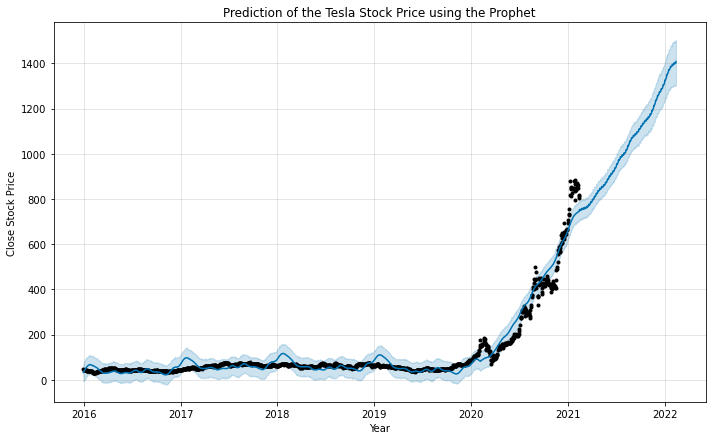

In [27]:
# Predict future values and visualise predictions
tesla_future = m.make_future_dataframe(periods=365) # Specify the number of days in future
prediction = m.predict(tesla_future)
m.plot(prediction)
plt.title("Prediction of the Tesla Stock Price using the Prophet")
plt.xlabel("Year")
plt.ylabel("Close Stock Price")
plt.show()

Model used all training data (black dots) and predicted Tesla stock price up to year 2022. Blue shadow is the confidence interval.

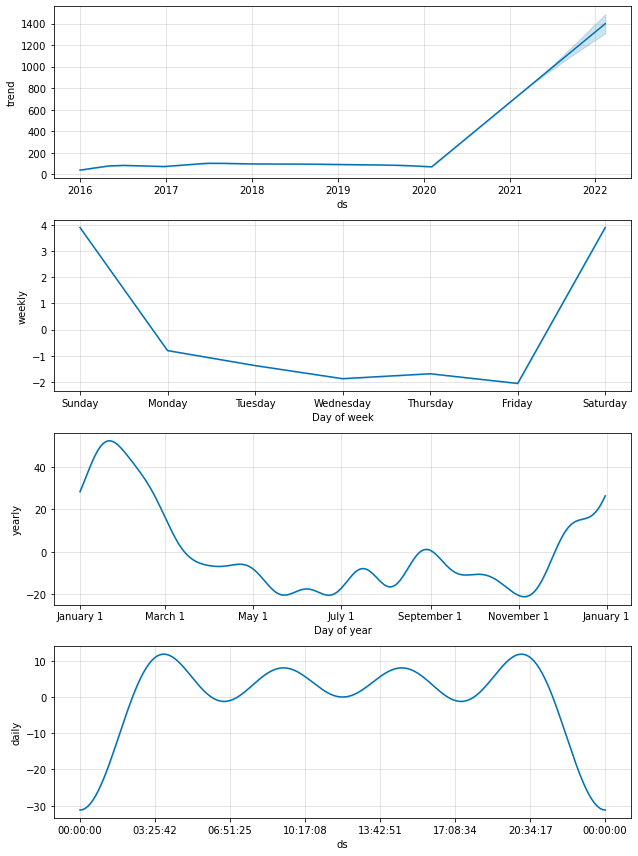

In [28]:
m.plot_components(prediction)
plt.show()

In [31]:
# Create functions
def setup_db():
    # reflect an existing database into a new model
    Base = automap_base()

    engine = create_engine("sqlite:///../sqlite_db/stock_market_sqlite.db")

    # reflect the tables
    Base.prepare(engine, reflect=True)

    # Save references to each table
    tesla = Base.classes.TSLA
    microsoft = Base.classes.MSFT
    gamestop = Base.classes.GME

    # Create session (link) from Python to the DB
    session = Session(engine)

In [51]:
def perform_prediction(stock_name):
    # Perform a query to retrieve tesla data
    results = session.query(stock_name.Date, stock_name.Close).all()
    df = pd.DataFrame(results, columns=["Date", "Close"])

    # Rename features as these names are needed for model fitting
    data = df.rename(columns={"Date":"ds", "Close":"y"})

    # let's create the Prophet model, setting the daily seasonality to true
    m = Prophet(daily_seasonality = True)
    m.fit(data) # fit the model using all data

    # we specify the number of days of future predictions
    future = m.make_future_dataframe(periods=365) 
    forecast_data = m.predict(future)

    # once get the forecasted data, we move again the date column to the index, both for the real and forecasted data
    data.set_index('ds', inplace=True)
    data.index = pd.to_datetime( data.index )

    forecast_data.set_index('ds', inplace=True)
    forecast_data.index = pd.to_datetime( forecast_data.index )

    # joining values with the predicted ones from the model, including expected price, upper and lower bound 
    viz_df = data.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

    # we start plotting the data in order to see the trend found from our model, even for future period of time 
    trace1 = go.Scatter(
        x = data.index,
        y = data[ "y" ],
        line = dict( color = "black" ),
        mode = 'lines',
        name = 'Real Data'
    )

    trace2 = go.Scatter(
        x = forecast_data.index,
        y = forecast_data[ "yhat" ],
        line = dict( color = "blue" ),
        mode = 'lines',
        name = 'Prediction'
    )

    trace3 = go.Scatter(
        x = viz_df.index,
        y = viz_df[ "yhat_upper" ],
        line = dict( color = "green" ),
        mode = 'lines',
        name = 'Upper Bound'
    )

    trace4 = go.Scatter(
        x = viz_df.index,
        y = viz_df[ "yhat_lower" ],
        line = dict( color = "red" ),
        mode = 'lines',
        name = 'Lower Bound'
    )

    layout = go.Layout(
        title = str( stock_name ),
        xaxis = {
            'title' : "Date"
        },
        yaxis = {'title' : "Close"}
    )

    fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
    fig.show()

    print( "\n\n" )

In [52]:
# Store stonks in list
stonks = [tesla, microsoft, gamestop]

In [53]:
# Test prediction function with all stocks
for stonk in stonks:
    perform_prediction(stonk)